$$
\text{Gegeben sei ein Zustandsgraph, bei dem jeder Knoten seinem eigenen Zustand entspricht.}
$$

$$
\text{Um den nächsten Zustand zu berechnen, definieren wir eine Übergangsmatrix } Q.
$$

$$
\pi_1 = \pi_0 Q
$$

$$
\text{Dabei ist } \pi_0 \text{ eine } N \times N \text{ Matrix, die die Wahrscheinlichkeitsverteilung der Positionen des Objektes beschreibt.}
$$

$$
\text{Das Objekt bewegt sich auf einer } N \times N \text{ Gitterfläche (ähnlich einem Schachbrett).}
$$

$$
\text{Die Übergangswahrscheinlichkeit basiert auf einer gaußschen Verteilung:}
$$

$$
Q_{x',y',x,y} = e^{-\sqrt{(x'-x)^2 + (y'-y)^2}}
$$

$$
\text{Die Übergangsmatrix } Q \text{ ist also ein } N \times N \times N \times N \text{ Tensor,}
$$

$$
\text{wobei jede Ausgangsposition } (x', y') \text{ eine eigene } N \times N \text{ Matrix mit zukünftigen Wahrscheinlichkeiten besitzt.}
$$

$$
\text{Nun fügen wir eine zeitliche Varianz hinzu.}
$$

$$
\text{Das Objekt ist am Tag aktiver und kann sich weiter bewegen als in der Nacht.}
$$

$$
\text{Daher führen wir eine zeitabhängige Übergangsmatrix } Q(t) \text{ ein.}
$$

$$
Q_{x',y',x,y}(t) = e^{-\frac{\sqrt{(x'-x)^2 + (y'-y)^2}}{2\cos^2(\omega t)\sigma^2}}
$$

$$
\text{Der Term } \cos^2(\omega t) \text{ beschreibt die tageszeitabhängige Aktivität des Objekts.}
$$

$$
\text{Für } t = 0, T, 2T, ... \text{ (Mitternacht) ist } \cos^2(\omega t) \approx 0, \text{ sodass die Bewegung stark eingeschränkt ist.}
$$

$$
\text{Für } t = \frac{T}{2}, \frac{3T}{2}, ... \text{ (Mittag) ist } \cos^2(\omega t) \approx 1, \text{ sodass das Objekt eine größere Reichweite hat.}
$$

$$
\text{Damit wird die Übergangsmatrix } Q(t) \text{ dynamisch und variiert über die Zeit.}
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

minx, maxx = -100, 100
miny, maxy = -100, 100
stepsx, stepsy = 30, 30

x = np.linspace(minx, maxx, stepsx)
y = np.linspace(miny, maxy, stepsy)

X, Y = np.meshgrid(x, y)

# Simpler case

(30, 30)

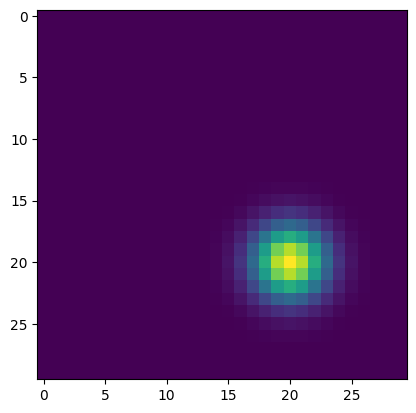

In [8]:
def q(x_,y_, t,w=1.57,sigma=20):
    matrix = np.exp(-((x_- X) ** 2 + (y_ - Y) ** 2) / (np.cos(w*t) * sigma) ** 2)
    return matrix / np.sum(matrix)


Q = np.array([[q(_x, _y,0) for _x in x] for _y in y])


def next(A,i):
    t = i
    N = np.sum(A * Q, axis=(2, 3))# + (q(0, 0,0, 1) if t % 20 < 10 else -q(20, -23,0, 1))
    #N = N/np.sum(N)
    return N


plt.imshow(Q[20, 20])
Q[0, 0].shape

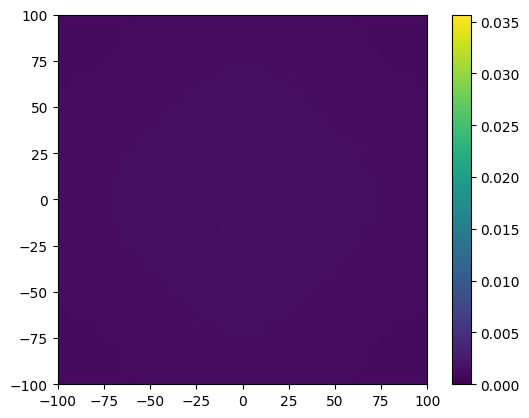

In [15]:
from matplotlib import animation
import json

S = q(0, 0, 0)


fig = plt.figure()
im = plt.imshow(S, extent=(minx, maxx, miny, maxy))  #, vmin=-0.1,vmax=0.1)
plt.colorbar()


def animate(i):
    global S
    S = next(S, i)
    im.set_array(S)
    return im


ani = animation.FuncAnimation(fig, animate, repeat=True, frames=stepsy, interval=500)

from IPython.display import HTML

HTML(ani.to_jshtml(default_mode="loop"))


# Spawn of Objects


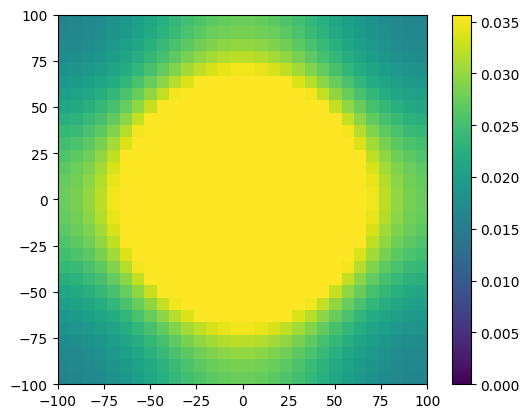

In [22]:

S = q(0, 0, 0)


fig = plt.figure()
im = plt.imshow(S, extent=(minx, maxx, miny, maxy))#, vmin=0,vmax=1)
plt.colorbar()

def next(A,i):
    t = i
    N = np.sum(A * Q, axis=(2, 3)) + q(0, 0,0, 1) #if t % 20 < 10 else -q(20, -23,0, 1))
    #N = N/np.sum(N)
    return N


def animate(i):
    global S
    S = next(S, i)
    im.set_array(S)
    return im


ani = animation.FuncAnimation(fig, animate, repeat=True, frames=stepsy, interval=1000)

from IPython.display import HTML

HTML(ani.to_jshtml(default_mode="loop"))

# Zeitlicher Aspekt

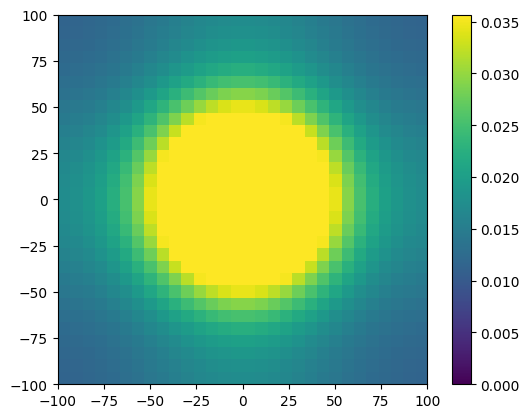

In [23]:
S = q(0, 0, 0)


fig = plt.figure()
im = plt.imshow(S, extent=(minx, maxx, miny, maxy))#, vmin=0,vmax=1)
plt.colorbar()

def next(A,i):
    t = i
    N = np.sum(A * Q, axis=(2, 3)) + (q(0, 0,0, 1) if t % 20 < 10 else 0)#-q(20, -23,0, 1))
    #N = N/np.sum(N)
    return N


def animate(i):
    global S
    S = next(S, i)
    im.set_array(S)
    return im


ani = animation.FuncAnimation(fig, animate, repeat=True, frames=stepsy, interval=1000)

from IPython.display import HTML

HTML(ani.to_jshtml(default_mode="loop"))

# Negative Wahrscheinlichkeit/ Absorbtion


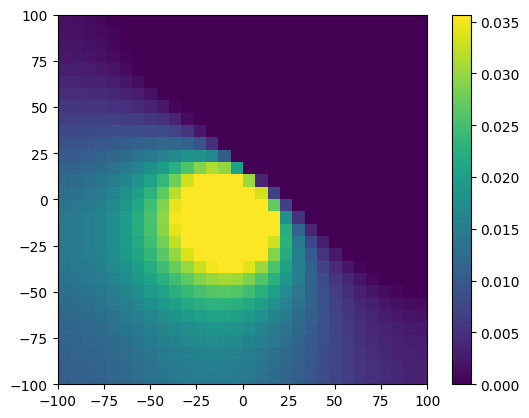

In [25]:
S = q(0, 0, 0)


fig = plt.figure()
im = plt.imshow(S, extent=(minx, maxx, miny, maxy))#, vmin=0,vmax=1)
plt.colorbar()

def next(A,i):
    t = i
    N = np.sum(A * Q, axis=(2, 3)) + (q(0, 0,0, 1)  -q(20, -23,0, 1))
    #N = N/np.sum(N)
    return N


def animate(i):
    global S
    S = next(S, i)
    im.set_array(S)
    return im


ani = animation.FuncAnimation(fig, animate, repeat=True, frames=stepsy, interval=1000)

from IPython.display import HTML

HTML(ani.to_jshtml(default_mode="loop"))

# Absorbtion mit Zeitlicher Varianz

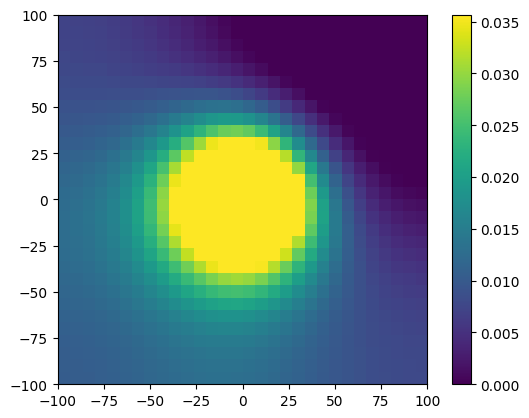

In [26]:
S = q(0, 0, 0)


fig = plt.figure()
im = plt.imshow(S, extent=(minx, maxx, miny, maxy))#, vmin=0,vmax=1)
plt.colorbar()

def next(A,i):
    t = i
    N = np.sum(A * Q, axis=(2, 3)) + (q(0, 0,0, 1) if t % 20 < 10 else -q(20, -23,0, 1))
    #N = N/np.sum(N)
    return N


def animate(i):
    global S
    S = next(S, i)
    im.set_array(S)
    return im


ani = animation.FuncAnimation(fig, animate, repeat=True, frames=stepsy, interval=1000)

from IPython.display import HTML

HTML(ani.to_jshtml(default_mode="loop"))

# Q(t)

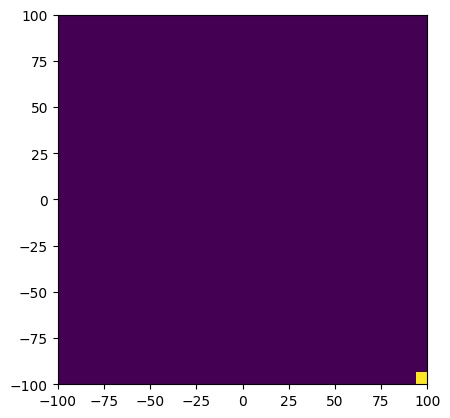

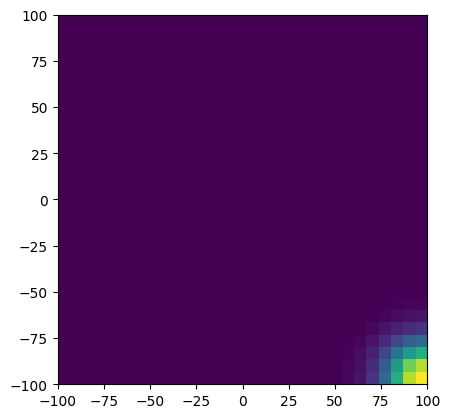

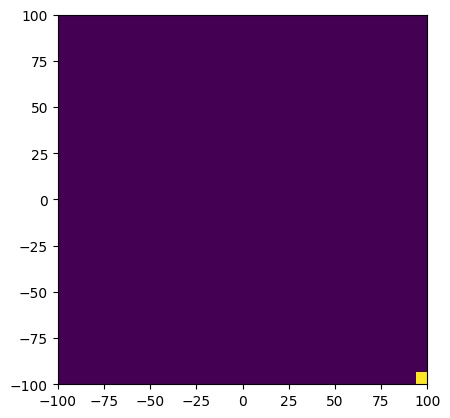

In [39]:
def q(x_,y_, t,w=1.57,sigma=20):
    matrix = np.exp(-((x_- X) ** 2 + (y_ - Y) ** 2) / (np.cos(w*t) * sigma) ** 2)
    return matrix / np.sum(matrix)


_Q = np.array([[lambda t:q(_x, _y,t) for _x in x] for _y in y])

def Q(A,t):
    _q = np.array([[q(_x, _y,t) for _x in x] for _y in y])
    return A*_q

def next(A,i):
    t = i
    N = np.sum(Q(A,t/5), axis=(2, 3)) + q(0, 0,0, 1)# if t % 20 < 10 else -q(20, -23,0, 1))
    #N = N/np.sum(N)
    return N


plt.imshow(_Q[0, 0](1),extent=(minx, maxx, miny, maxy))
plt.show()
plt.imshow(_Q[0, 0](2),extent=(minx, maxx, miny, maxy))
plt.show()
plt.imshow(_Q[0, 0](3),extent=(minx, maxx, miny, maxy))


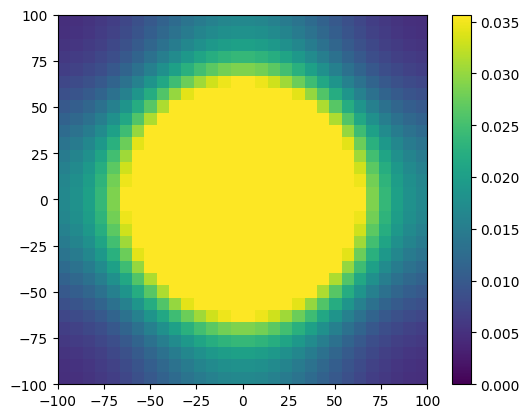

In [40]:
S = q(0, 0, 0)


fig = plt.figure()
im = plt.imshow(S, extent=(minx, maxx, miny, maxy))#, vmin=0,vmax=1)
plt.colorbar()



def animate(i):
    global S
    S = next(S, i)
    im.set_array(S)
    return im


ani = animation.FuncAnimation(fig, animate, repeat=True, frames=stepsy, interval=1000)

from IPython.display import HTML

HTML(ani.to_jshtml(default_mode="loop"))